In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import re
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

**Dataset Overview**

In [51]:
df = pd.read_csv('airbnb dataset.csv')
df.head()

,Unnamed: 0,id,name,rating,reviews,host_name,host_id,address,features,amenities,...,price,country,bathrooms,beds,guests,toiles,bedrooms,studios,checkin,checkout
0,0,49849504,Perla bungalov,4.71,64,Mehmetcan,357334205.0,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...",...,8078,Turkey,1,1,2,0,2,0,Flexible,12 00 pm
1,1,50891766,Authentic Beach Architect Sheltered Villa with...,New,0,Fatih,386223873.0,"Kaş, Antalya, Turkey","4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...",...,4665,Turkey,2,2,4,0,2,0,4 00 pm - 11 00 pm,10 00 am
2,2,50699164,cottages sataplia,4.85,68,Giorgi,409690853.0,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...",...,5991,Georgia,1,3,4,0,1,0,After 1 00 pm,12 00 pm
3,3,49871422,Sapanca Breathable Bungalow,5.0,13,Melih,401873242.0,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...",...,11339,Turkey,1,2,4,0,1,0,After 2 00 pm,12 00 pm
4,4,51245886,Bungalov Ev 2,New,0,Arp Sapanca,414884116.0,"Sapanca, Sakarya, Turkey","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...",...,6673,Turkey,1,1,2,0,1,0,After 2 00 pm,12 00 pm


In [52]:
df.shape

(12805, 23)

Size: 12805 listings

Features: 23 columns including id, name, rating, reviews, host_name, address, amenities, price, and various property features

Target Variable: price (price per night in local currency)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12805 entries, 0 to 12804
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    12805 non-null  int64  
 1   id            12805 non-null  int64  
 2   name          12805 non-null  object 
 3   rating        12805 non-null  object 
 4   reviews       12805 non-null  object 
 5   host_name     12797 non-null  object 
 6   host_id       12805 non-null  float64
 7   address       12805 non-null  object 
 8   features      12805 non-null  object 
 9   amenities     12805 non-null  object 
 10  safety_rules  12805 non-null  object 
 11  hourse_rules  12805 non-null  object 
 12  img_links     12805 non-null  object 
 13  price         12805 non-null  int64  
 14  country       12805 non-null  object 
 15  bathrooms     12805 non-null  int64  
 16  beds          12805 non-null  int64  
 17  guests        12805 non-null  int64  
 18  toiles        12805 non-nu

In [54]:
df.isnull().sum()

Unnamed: 0         0
id                 0
name               0
rating             0
reviews            0
host_name          8
host_id            0
address            0
features           0
amenities          0
safety_rules       0
hourse_rules       0
img_links          0
price              0
country            0
bathrooms          0
beds               0
guests             0
toiles             0
bedrooms           0
studios            0
checkin          800
checkout        2450
dtype: int64

There is 8 null values on host_name
800 null values in checkin
and 2450 null values in checkout

In [55]:
df.dtypes

Unnamed: 0        int64
id                int64
name             object
rating           object
reviews          object
host_name        object
host_id         float64
address          object
features         object
amenities        object
safety_rules     object
hourse_rules     object
img_links        object
price             int64
country          object
bathrooms         int64
beds              int64
guests            int64
toiles            int64
bedrooms          int64
studios           int64
checkin          object
checkout         object
dtype: object

In [56]:
numerical_cols = ['rating', 'reviews', 'price', 'bathrooms', 'beds', 'guests', 'toiles', 'studios', 'bedrooms']
df[numerical_cols].describe()

,price,bathrooms,beds,guests,toiles,studios,bedrooms
count,1.280500e+04,12805.000000,12805.000000,12805.000000,12805.000000,12805.000000,12805.000000
mean,1.769780e+04,1.874424,3.316751,5.213745,0.019211,0.023585,2.136041
std,4.569364e+04,2.091399,4.037791,3.808830,0.137272,0.151757,2.359005
min,3.930000e+02,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,3.994000e+03,1.000000,1.000000,2.000000,0.000000,0.000000,1.000000
50%,8.175000e+03,1.000000,2.000000,4.000000,0.000000,0.000000,1.000000
75%,1.606200e+04,2.000000,4.000000,6.000000,0.000000,0.000000,3.000000
max,1.907963e+06,50.000000,98.000000,16.000000,1.000000,1.000000,50.000000


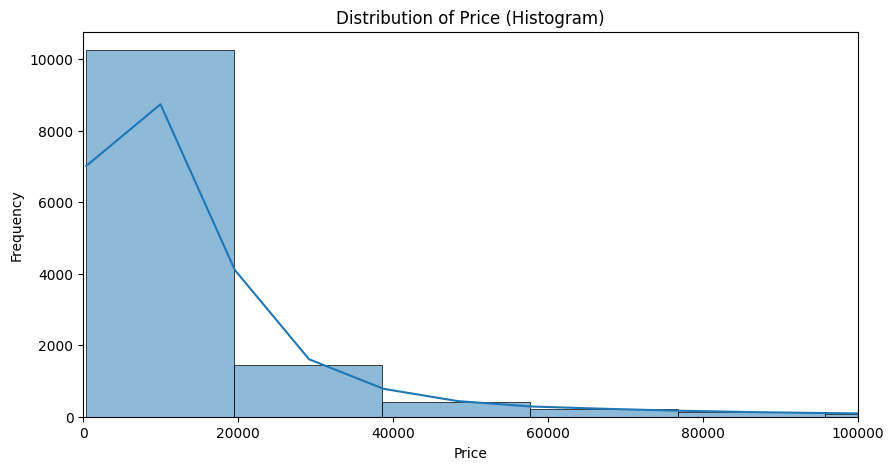

In [57]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='price', bins=100, kde=True)
plt.title('Distribution of Price (Histogram)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, 100000)
plt.show()

In [58]:
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # convert or set NaN if invalid

df_clean = df[numerical_cols].dropna()
df_clean

,rating,reviews,price,bathrooms,beds,guests,toiles,studios,bedrooms
0,4.71,64.0,8078,1,1,2,0,0,2
2,4.85,68.0,5991,1,3,4,0,0,1
3,5.00,13.0,11339,1,2,4,0,0,1
9,4.67,3.0,30486,3,6,10,0,0,4
10,4.97,77.0,9052,1,1,4,0,0,1
...,...,...,...,...,...,...,...,...,...
12800,4.94,16.0,4288,8,0,4,0,0,0
12801,4.67,6.0,15200,0,1,2,1,0,1
12802,4.67,3.0,9103,1,2,2,0,0,1
12803,4.86,7.0,42262,2,4,8,0,0,2


In [59]:
corr_matrix = df_clean.corr()
corr_matrix

,rating,reviews,price,bathrooms,beds,guests,toiles,studios,bedrooms
rating,1.000000,-0.024508,0.079321,-0.005719,-0.012120,-0.025639,-0.005639,-0.012808,-0.002642
reviews,-0.024508,1.000000,-0.041787,-0.100856,-0.067480,-0.078039,0.038396,0.014476,-0.094949
price,0.079321,-0.041787,1.000000,0.368767,0.280980,0.352726,0.008769,-0.043562,0.386002
bathrooms,-0.005719,-0.100856,0.368767,1.000000,0.630272,0.693867,-0.165015,-0.073469,0.814351
beds,-0.012120,-0.067480,0.280980,0.630272,1.000000,0.729487,-0.049033,-0.063726,0.781697
guests,-0.025639,-0.078039,0.352726,0.693867,0.729487,1.000000,-0.080337,-0.080289,0.782958
toiles,-0.005639,0.038396,0.008769,-0.165015,-0.049033,-0.080337,1.000000,0.003798,-0.087870
studios,-0.012808,0.014476,-0.043562,-0.073469,-0.063726,-0.080289,0.003798,1.000000,-0.181961
bedrooms,-0.002642,-0.094949,0.386002,0.814351,0.781697,0.782958,-0.087870,-0.181961,1.000000


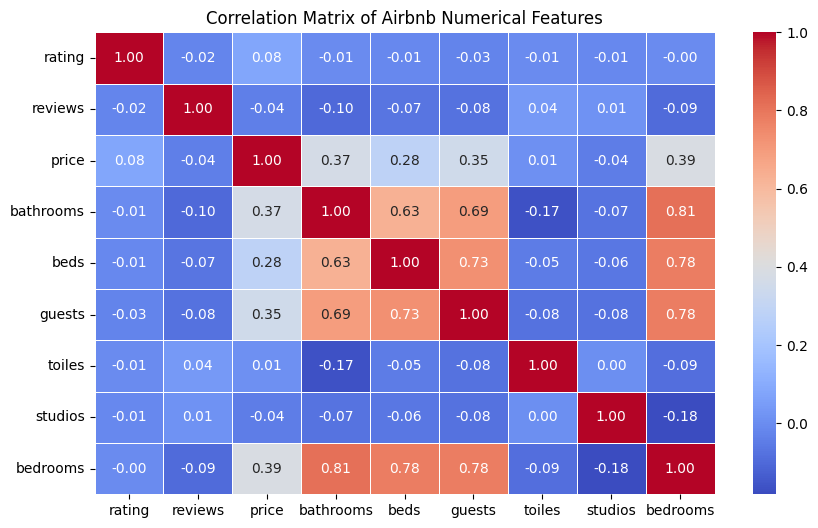

In [60]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix of Airbnb Numerical Features')
plt.show()

In [61]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

top_countries = df['country'].value_counts().nlargest(10).index
top_hosts = df['host_name'].value_counts().nlargest(10).index
top_bedrooms = df['bedrooms'].value_counts().nlargest(10).index

df_filtered = df[df['country'].isin(top_countries) & df['host_name'].isin(top_hosts) & df['bedrooms'].isin(top_bedrooms)]

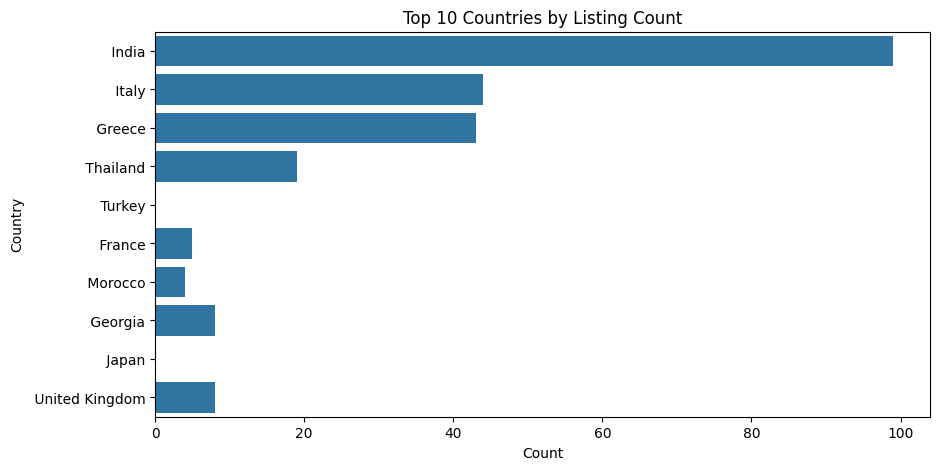

In [62]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_filtered, y='country', order=top_countries)
plt.title('Top 10 Countries by Listing Count')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

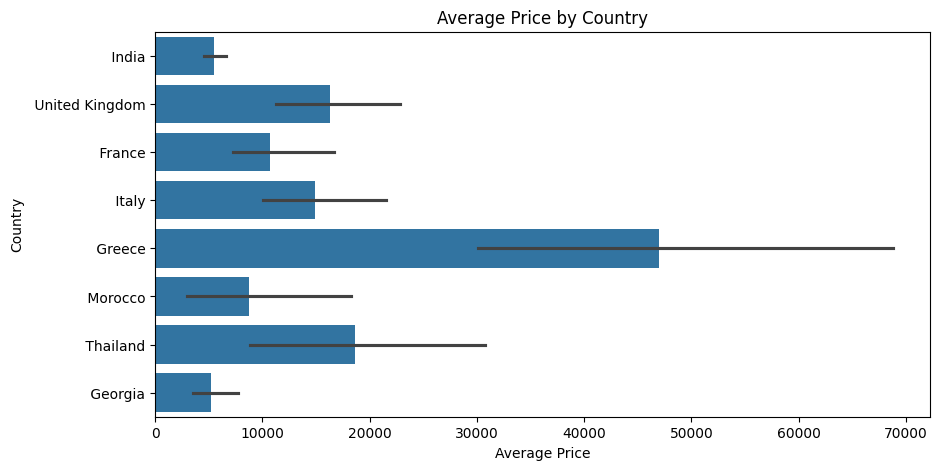

In [63]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_filtered, x='price', y='country', estimator='mean')
plt.title('Average Price by Country')
plt.xlabel('Average Price')
plt.ylabel('Country')
plt.show()

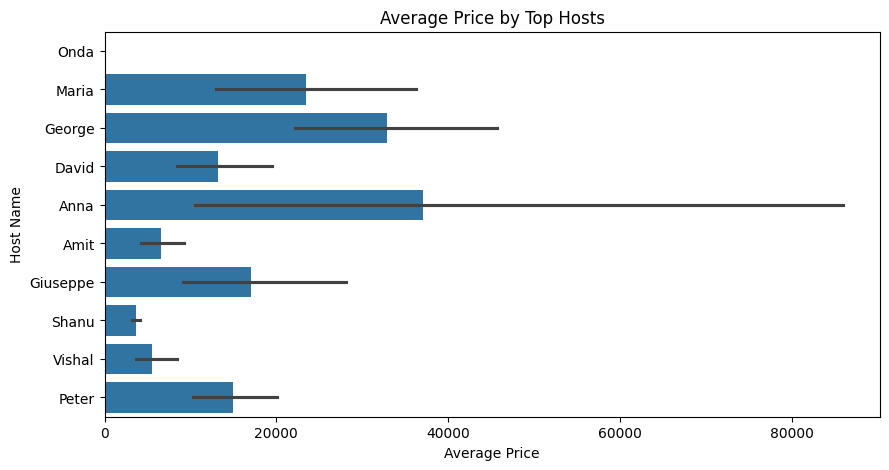

In [64]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_filtered, x='price', y='host_name', estimator='mean', order=top_hosts)
plt.title('Average Price by Top Hosts')
plt.xlabel('Average Price')
plt.ylabel('Host Name')
plt.show()

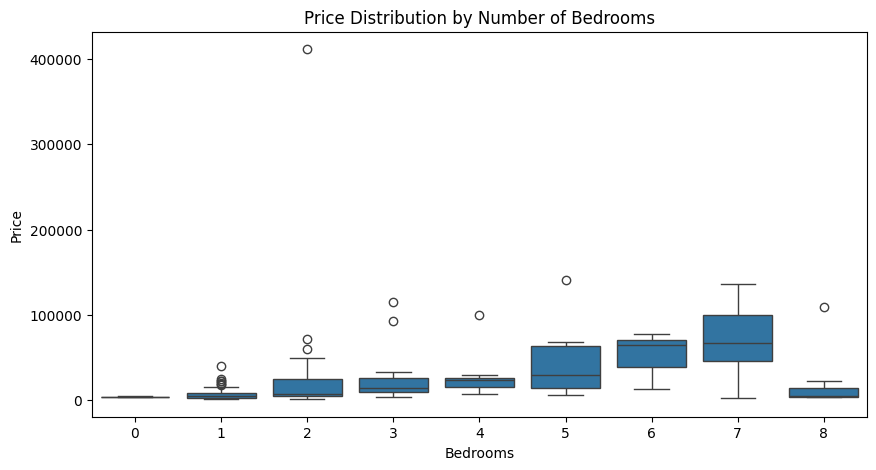

In [65]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_filtered, x='bedrooms', y='price')
plt.title('Price Distribution by Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

In [66]:
df_filtered.isnull().sum()

Unnamed: 0       0
id               0
name             0
rating          94
reviews          0
host_name        0
host_id          0
address          0
features         0
amenities        0
safety_rules     0
hourse_rules     0
img_links        0
price            0
country          0
bathrooms        0
beds             0
guests           0
toiles           0
bedrooms         0
studios          0
checkin         16
checkout        44
dtype: int64

**94 Rating is messing**

In [67]:
df_filtered['rating'] = df_filtered['rating'].astype(float)
df_filtered['rating'].fillna(df_filtered['rating'].median(), inplace=True)

C:\Users\Laptop Plaza\AppData\Local\Temp\ipykernel_13220\2951622392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['rating'] = df_filtered['rating'].astype(float)
C:\Users\Laptop Plaza\AppData\Local\Temp\ipykernel_13220\2951622392.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original 

In [68]:
df_filtered.isnull().sum()

Unnamed: 0       0
id               0
name             0
rating           0
reviews          0
host_name        0
host_id          0
address          0
features         0
amenities        0
safety_rules     0
hourse_rules     0
img_links        0
price            0
country          0
bathrooms        0
beds             0
guests           0
toiles           0
bedrooms         0
studios          0
checkin         16
checkout        44
dtype: int64

In [69]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df_filtered[(df_filtered['price'] >= lower_bound) & (df_filtered['price'] <= upper_bound)]
df_clean.shape

(207, 23)

In [70]:
df_clean

,Unnamed: 0,id,name,rating,reviews,host_name,host_id,address,features,amenities,...,price,country,bathrooms,beds,guests,toiles,bedrooms,studios,checkin,checkout
696,696,612163237396681090,Room R2 Right on Arambol Beach with pool and s...,4.885,1.0,Vishal,369358454.0,"Arambol, Goa, India","3 guests,1 bedroom,1 bed,1 private bathroom","Beach access – Beachfront,Wifi,Free on-street ...",...,1438.0,India,1,1,3,0,1,0,After 2 00 pm,10 00 am
836,836,53816778,Beautiful sea facing 1 bhk apartment with pool,4.885,2.0,Maria,435928404.0,"Reis Magos, Goa, India","3 guests,1 bedroom,1 bed,1 bathroom","Garden view,Mountain view,Public or shared bea...",...,3252.0,India,1,1,3,0,1,0,After 2 00 pm,11 00 am
839,839,53195903,Pool view beautiful 2bhk close to Candolim beach,4.710,7.0,Maria,116190876.0,"Candolim, Goa, India","6 guests,2 bedrooms,2 beds,2.5 bathrooms","Public or shared beach access,Kitchen,Wifi,Ded...",...,3452.0,India,2,2,6,0,2,0,NaN,NaN
860,860,47149961,Citadel By CasaFlip:2BHK Apt in Anjuna/Vagator,4.930,29.0,Vishal,373455509.0,"North Goa, Goa, India","6 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...",...,4998.0,India,2,2,6,0,2,0,2 00 pm - 10 00 pm,10 00 am
889,889,559159432819906802,Enclave by CasaFlip: 2BHK apartment in North Goa,5.000,5.0,Vishal,373455509.0,"Anjuna, Goa, India","6 guests,2 bedrooms,2 beds,2 bathrooms","Beach access,Kitchen,Wifi,Free parking on prem...",...,4998.0,India,2,2,6,0,2,0,After 2 00 pm,10 00 am
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12389,12389,582808401130006280,"Sea, Nature & Relax ★ Luxury AC Hut On The Bea...",4.885,0.0,Peter,32651143.0,"Patnem Beach, Goa, India","3 guests,1 bedroom,1 bed,1 bathroom","Beach access – Beachfront,Wifi,Dedicated works...",...,7863.0,India,1,1,3,0,1,0,After 2 00 pm,11 00 am
12625,12625,52214738,Dome Phandao/1bd+bkfst at Nakara Villas & Glam...,4.885,1.0,David,20922655.0,"Ban Nakhuang, อุดรธานี, Thailand","3 guests,1 bedroom,2 beds,1 bathroom","Garden view,Resort view,Lake access,Kitchen,Wi...",...,6933.0,Thailand,1,2,3,0,1,0,After 2 00 pm,11 00 am
12665,12665,52212952,Sangchan Dome/1bd+bkfst @ Nakara Villas & Glam...,4.885,0.0,David,20922655.0,"Ban Nakhuang, อุดรธานี, Thailand","3 guests,1 bedroom,2 beds,1 bathroom","Garden view,Lake view,Kitchen,Wifi,Dedicated w...",...,6933.0,Thailand,1,2,3,0,1,0,After 2 00 pm,11 00 am
12756,12756,19354479,"Eremo di Montevergine : Seaview Dome, suspende...",4.840,58.0,Giuseppe,1987314.0,"Forio, Italy","2 guests,1 bedroom,1 bed,0 bathrooms","Bay view,Garden view,Beach access – Beachfront...",...,10818.0,Italy,0,1,2,0,1,0,3 00 pm - 12 00 am,11 00 am


In [71]:
features = ['rating', 'reviews', 'bathrooms', 'beds', 'bedrooms', 'guests','country']

X = df_clean[features]
y = df_clean['price']

# One-hot encoding
X = pd.get_dummies(X, columns=['country'], drop_first=True)

In [72]:
X

,rating,reviews,bathrooms,beds,bedrooms,guests,country_ Georgia,country_ Greece,country_ India,country_ Italy,country_ Morocco,country_ Thailand,country_ United Kingdom
696,4.885,1.0,1,1,1,3,False,False,True,False,False,False,False
836,4.885,2.0,1,1,1,3,False,False,True,False,False,False,False
839,4.710,7.0,2,2,2,6,False,False,True,False,False,False,False
860,4.930,29.0,2,2,2,6,False,False,True,False,False,False,False
889,5.000,5.0,2,2,2,6,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12389,4.885,0.0,1,1,1,3,False,False,True,False,False,False,False
12625,4.885,1.0,1,2,1,3,False,False,False,False,False,True,False
12665,4.885,0.0,1,2,1,3,False,False,False,False,False,True,False
12756,4.840,58.0,0,1,1,2,False,False,False,True,False,False,False


**Model**

In [73]:
df_clean['price'] = np.log1p(df_clean['price'])
y = df_clean['price']

C:\Users\Laptop Plaza\AppData\Local\Temp\ipykernel_13220\3982424157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['price'] = np.log1p(df_clean['price'])


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
def build_ann_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [76]:
ann_model = build_ann_model(X_train_scaled.shape[1])

c:\Users\Laptop Plaza\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [77]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [78]:
history = ann_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 65.1570 - val_loss: 57.5545
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 57.8883 - val_loss: 50.3904
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 50.0113 - val_loss: 43.0514
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 46.5027 - val_loss: 35.8627
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 36.7933 - val_loss: 28.8279
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 27.5927 - val_loss: 22.3921
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 21.9795 - val_loss: 16.9715
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 13.1258 - val_loss: 13.2641
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9.1988 - val_loss: 11.0885
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.2020 - val_loss: 9.6920
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.2956 - val_loss: 9.1428
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss

In [79]:
y_pred = ann_model.predict(X_test_scaled).ravel()
y_pred_actual = np.expm1(y_pred)
y_test_actual = np.expm1(y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


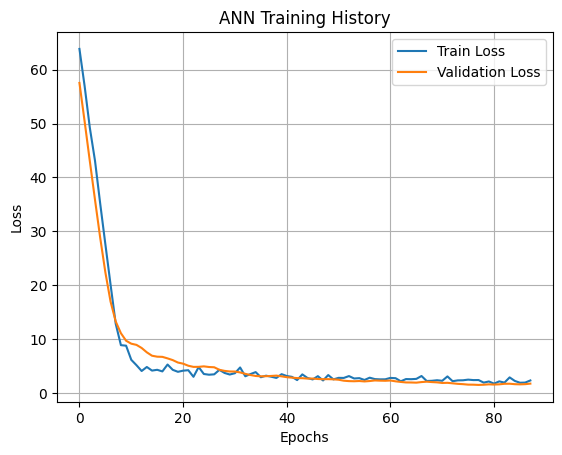

In [80]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("ANN Training History")
plt.legend()
plt.grid(True)
plt.show()

In [81]:
y_pred = ann_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [82]:
rmse

1.0188928083712478

In [83]:
r2

-0.406994508939422

In [84]:
y_pred = ann_model.predict(X_test_scaled).ravel()

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [85]:
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 1.04
Root Mean Squared Error (RMSE): 1.02
R² Score: -0.41
